### Time Series Analysis and Forecasting

In [1]:
# importing liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
# month column need to be index
data.set_index('Month', inplace= True)

In [6]:
data.shape

(144, 1)

In [7]:
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


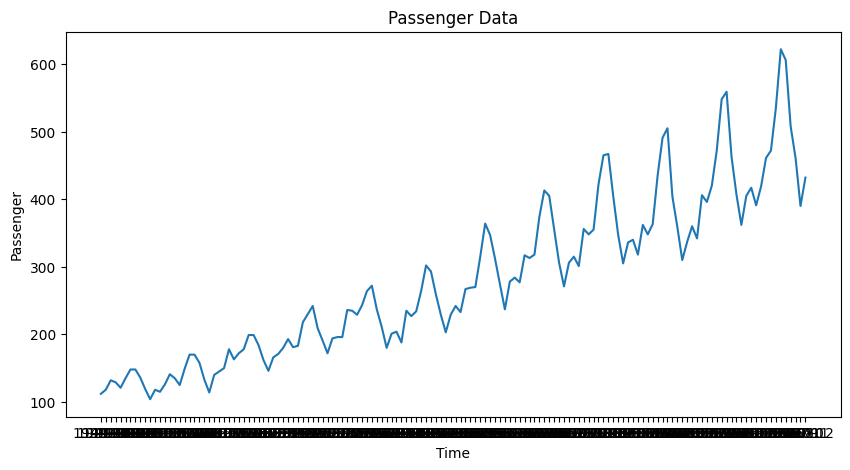

In [8]:
plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'])
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.title('Passenger Data')
plt.show()

#### Check data is stationary or not

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Calculating rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plotting the rolling statistics
    plt.figure(figsize=(10,6))
    plt.plot(timeseries, color='red', label='Original')
    plt.plot(movingAverage, color='green', label='Rolling Mean')
    plt.plot(movingSTD, color='blue', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Stationarity Check')
    plt.show()

    # Performing Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    air_pass_test = adfuller(timeseries)

    # Creating a DataFrame to display results
    dfout = pd.Series(air_pass_test[0:4], index=['Test Stat', 'P-Value', '# Lags used', 'No. of Observations'])

    # Adding critical values
    for key, value in air_pass_test[4].items():
        dfout['Critical Value (%s)' % key] = value

    print(dfout)


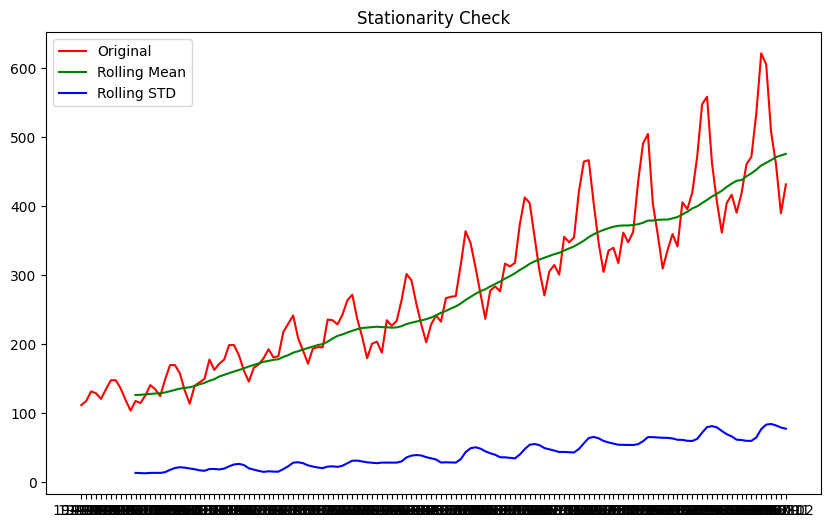

Results of Dickey-Fuller Test:
Test Stat                 0.815369
P-Value                   0.991880
# Lags used              13.000000
No. of Observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [10]:
test_stationarity (data)

### p-value can be use  for hypothesis testing 
#### If the P-value is less than > 0.05 = data is STATIONARY
#### If the P-value is greater than < 0.05 = data is NOT STATIONARY
#### here, P-value is 0.99> 0.05 that means our data is Not Stationary

In [11]:
# series is non stationary, P-value reduced with log function

### Apply some trnasformations to make timeseries Stationary

In [12]:
# Log Trnasformation
airpass_log = np.log(data)

In [13]:
airpass_log

,#Passengers
Month,
1949-01,4.718499
1949-02,4.770685
1949-03,4.882802
1949-04,4.859812
1949-05,4.795791
...,...
1960-08,6.406880
1960-09,6.230481
1960-10,6.133398


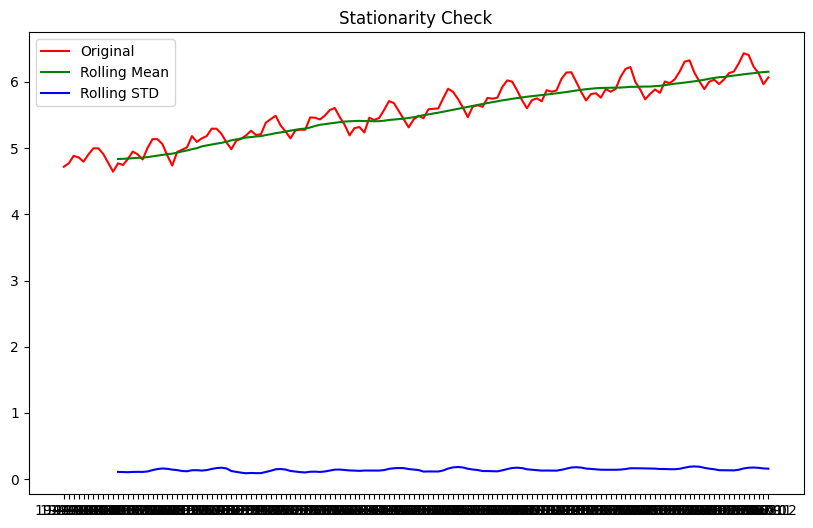

Results of Dickey-Fuller Test:
Test Stat                -1.717017
P-Value                   0.422367
# Lags used              13.000000
No. of Observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [14]:
test_stationarity(airpass_log)

### calculate moving average of log data

In [15]:
log_movingAverage = airpass_log.rolling(window = 12).mean()
log_movingSTD = airpass_log.rolling(window = 12).std()

In [18]:
log_movingAverage.head(20)

,#Passengers
Month,
1949-01,NaN
1949-02,NaN
1949-03,NaN
1949-04,NaN
1949-05,NaN
1949-06,NaN
1949-07,NaN
1949-08,NaN
1949-09,NaN


In [19]:
airpass_new = airpass_log-log_movingAverage

In [20]:
airpass_new.dropna(inplace = True)

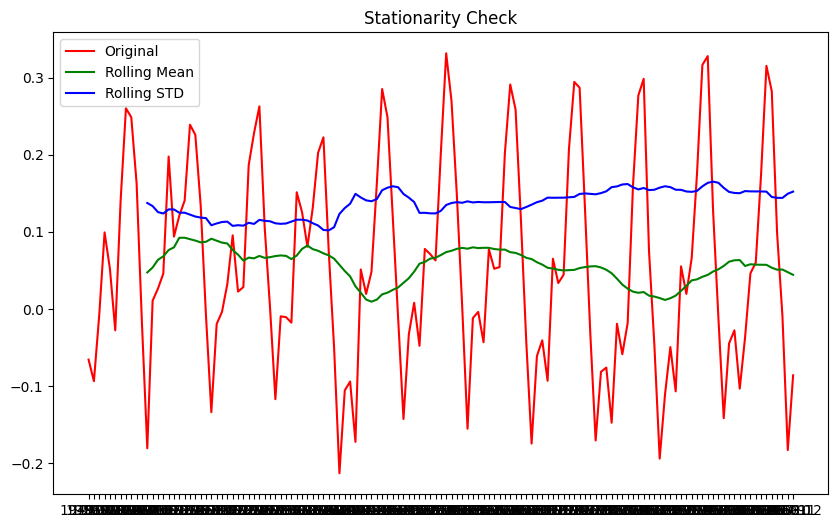

Results of Dickey-Fuller Test:
Test Stat                -3.162908
P-Value                   0.022235
# Lags used              13.000000
No. of Observations     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [21]:
test_stationarity(airpass_new)

In [ ]:
# here P-value decreased now to 0.022